# Assignment 4

Welcome to Assignment 4. This will be the most fun. Now we will prepare data for plotting.

Just make sure you hit the play button on each cell from top to down. There are three functions you have to implement. Please also make sure than on each change on a function you hit the play button again on the corresponding cell to make it available to the rest of this notebook. Please also make sure to only implement the function bodies and DON'T add any additional code outside functions since this might confuse the autograder.

So the function below is used to make it easy for you to create a data frame from a cloudant data frame using the so called "DataSource" which is some sort of a plugin which allows ApacheSpark to use different data sources.


Sampling is one of the most important things when it comes to visualization because often the data set get so huge that you simply

- can't copy all data to a local Spark driver (Watson Studio is using a "local" Spark driver)
- can't throw all data at the plotting library

Please implement a function which returns a 10% sample of a given data frame:

In [11]:
def getSample(df,spark):
    return df.limit(round(df.count()*.10))

Now we want to create a histogram and boxplot. Please ignore the sampling for now and return a python list containing all temperature values from the data set

In [12]:
def getListForHistogramAndBoxPlot(df,spark):
    
    result = spark.sql("select temperature from washing where temperature is not null")
    result_array = result.rdd.map(lambda row : row.temperature).sample(False,0.1).collect()
    return result_array

Finally we want to create a run chart. Please return two lists (encapusalted in a python tuple object) containing temperature and timestamp (ts) ordered by timestamp. Please refere to the following link to learn more about tuples in python: https://www.tutorialspoint.com/python/python_tuples.htm

In [13]:
#should return a tuple containing the two lists for timestamp and temperature
#please make sure you take only 10% of the data by sampling
#please also ensure that you sample in a way that the timestamp samples and temperature samples correspond (=> call sample on an object still containing both dimensions)
def getListsForRunChart(df,spark):
    result = spark.sql("select temperature,ts from washing where temperature is not null order by ts asc")
    result = getSample(result,spark)
    return (result.select("ts").collect(),result.select("temperature").collect())
    

### PLEASE DON'T REMOVE THIS BLOCK - THE FOLLOWING CODE IS NOT GRADED
#axx
### PLEASE DON'T REMOVE THIS BLOCK - THE FOLLOWING CODE IS NOT GRADED

Now it is time to connect to the object store and read a PARQUET file and create a dataframe out of it. We've created that data for you already. Using SparkSQL you can handle it like a database.

In [14]:
import ibmos2spark

# @hidden_cell
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'api_key': 'PUJMZf9PLqN4y-6NUtVlEuq6zFoWhfuecFVMYLBrkxrT',
    'service_id': 'iam-ServiceId-9cd8e66e-3bb4-495a-807a-588692cca4d0',
    'iam_service_endpoint': 'https://iam.bluemix.net/oidc/token'}

configuration_name = 'os_b0f1407510994fd1b793b85137baafb8_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
# Since JSON data can be semi-structured and contain additional metadata, it is possible that you might face issues with the DataFrame layout.
# Please read the documentation of 'SparkSession.read()' to learn more about the possibilities to adjust the data loading.
# PySpark documentation: http://spark.apache.org/docs/2.0.2/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.json

df = spark.read.parquet(cos.url('washing.parquet', 'courseradsnew-donotdelete-pr-1hffrnl2pprwut'))
df.rdd.toDF().registerTempTable("washing")
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [15]:
#getSample(df,spark)
print(df.count())
round(df.count()*.10)

2058


206

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([  9.,  13.,  18.,  15.,   9.,  11.,   8.,  13.,  12.,  21.]),
 array([  80.,   82.,   84.,   86.,   88.,   90.,   92.,   94.,   96.,
          98.,  100.]),
 <a list of 10 Patch objects>)

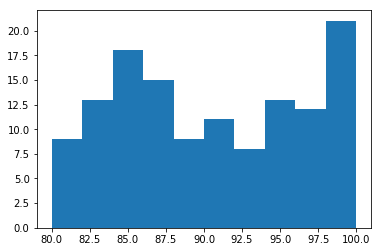

In [17]:
plt.hist(getListForHistogramAndBoxPlot(df,spark))
#plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x2b750be83ac8>],
 'caps': [<matplotlib.lines.Line2D at 0x2b750bd6f9b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b750be8d390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2b750be89f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2b750be83c50>,
  <matplotlib.lines.Line2D at 0x2b750be891d0>]}

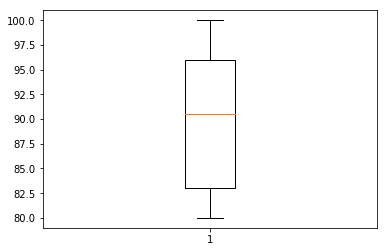

In [18]:
plt.boxplot(getListForHistogramAndBoxPlot(df,spark))
#plt.show()

In [19]:
lists = getListsForRunChart(df,spark)

Text(0,0.5,'temperature')

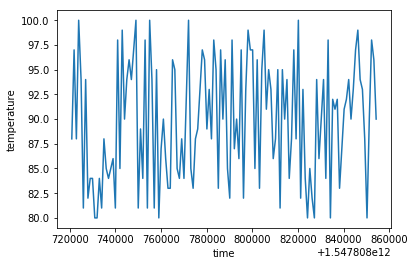

In [20]:
plt.plot(lists[0],lists[1])
plt.xlabel("time")
plt.ylabel("temperature")
#plt.show()

Congratulations, you are done! Please download the notebook as python file, name it assignment4.1.py and sumbit it to the grader.